<a href="https://colab.research.google.com/github/ashkanradjou/CPU-Scheduling-Simulation-in-Rust/blob/main/Bariess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## توابع

In [ ]:
import numpy as np
import time

def generate_random_matrix(n):
    matrix = np.random.randint(0, 5, size=(n, n))
    return matrix

def bareiss_algorithm(A):
    n = A.shape[0]
    M = A.astype(np.float64).copy()
    sign = 1


    for k in range(n):
        # If the diagonal element is zero, swap rows
        if M[k, k] == 0:
            # Find a row with non-zero element in the same column
            swap_row = k + 1
            while swap_row < n and M[swap_row, k] == 0:
                swap_row += 1
            # If all elements in the column are zero, determinant is zero
            if swap_row == n:
                return 0
            # Swap rows
            M[[k, swap_row]] = M[[swap_row, k]]
            sign = - sign

        for i in range(k + 1, n):
            for j in range(k + 1, n):
                M[i, j] = (M[i, j] * M[k, k] - M[i, k] * M[k, j])
                if k > 0:
                    M[i, j] /= M[k-1, k-1]



    return sign * M[-1, -1]

def gaussian_elimination_determinant(A):
    n = A.shape[0]
    M = A.astype(np.float64).copy()
    sign = 1

    for k in range(n):
        # If the diagonal element is zero, swap rows
        if M[k, k] == 0:
            # Find a row with non-zero element in the same column
            swap_row = k + 1
            while swap_row < n and M[swap_row, k] == 0:
                swap_row += 1
            # If all elements in the column are zero, determinant is zero
            if swap_row == n:
                return 0
            # Swap rows
            M[[k, swap_row]] = M[[swap_row, k]]
            sign = -sign

        # Eliminate the entries below the k-th pivot
        for i in range(k + 1, n):
            if M[i, k] == 0:
                continue
            factor = M[i, k] / M[k, k]
            M[i, k:] -= factor * M[k, k:]

    # The determinant is the product of the diagonal elements
    determinant = sign * np.prod(np.diag(M))
    return determinant

def lu_decomposition_determinant(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()
    sign = 1
    for k in range(n-1):
        if U[k, k] == 0:
            return 0  # If diagonal element is zero, determinant is zero
        for i in range(k+1, n):
            factor = U[i, k] / U[k, k]
            L[i, k] = factor
            U[i, k:n] -= factor * U[k, k:n]

    # Determinant is the product of the diagonal elements of U
    determinant = sign * np.prod(np.diag(U))
    return determinant



## ماتریس های آزمایشی

In [ ]:
# Example usage
A = np.array([
    [0, 2, 2],
    [2, 4, 2],
    [2, 2, 4]
], dtype=float)

B = np.array([
    [3, 1, 6],
    [2, 4, 3],
    [1, 5, 2]
], dtype=float)

D = np.array([
    [3, 0, 0],
    [0, 4, 0],
    [0, 0, 2]
], dtype=float)

C = np.array([
    [3, 5, 4],
    [0, 4, 1],
    [0, 0, 3]
], dtype=float)

I = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
], dtype=float)

X = generate_random_matrix(10)
print("Original Matrix:")
print(X)

Original Matrix:
[[4 1 0 3 0 2 1 1 2 3]
 [3 3 2 0 1 3 1 4 0 2]
 [4 4 1 4 3 1 2 3 1 3]
 [0 0 3 1 3 2 2 4 2 4]
 [1 0 0 3 0 2 4 2 2 1]
 [0 0 2 1 3 2 4 3 3 4]
 [4 3 3 3 0 2 0 3 0 4]
 [0 2 3 4 0 1 3 4 1 4]
 [4 0 3 4 1 2 1 3 4 1]
 [2 4 0 0 4 2 3 4 0 4]]


## نتایج

In [ ]:
start = time.time()
matrix = X
determinant = bareiss_algorithm(matrix)
#determinant = lu_decomposition_determinant(matrix)
#determinant = gaussian_elimination_determinant(matrix)
print("Time: ")
print ( (time.time() - start))

print("\nDeterminant of the original matrix:")
print(determinant)

Time: 
0.002434968948364258

Determinant of the original matrix:
-15585.0


## نمودار ها

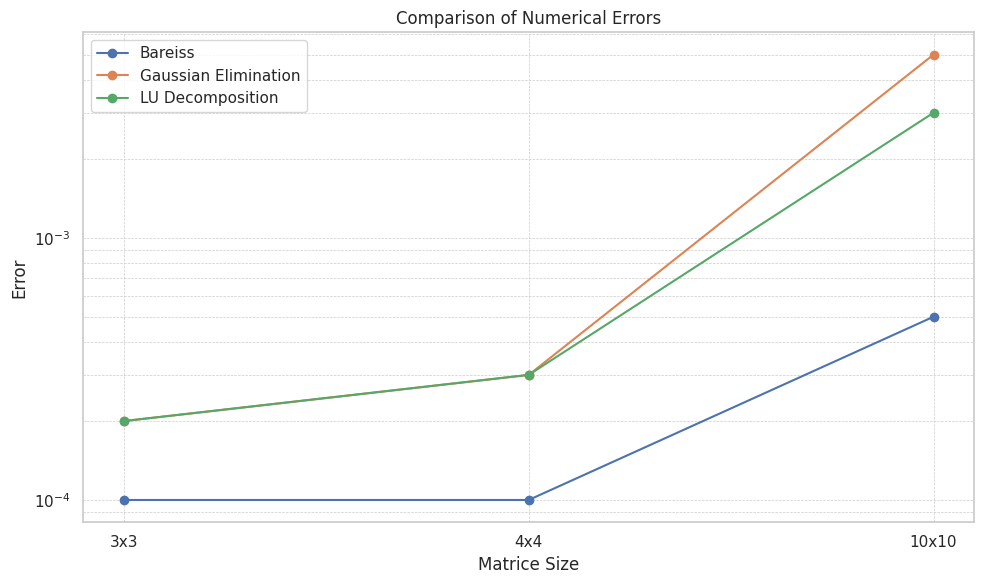

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# داده‌های خطا
matrix_sizes = ['3x3', '4x4', '10x10']
bareiss_error = [0.0001, 0.0001, 0.0005]
gaussian_error = [0.0002, 0.0003, 0.0050]
lu_error = [0.0002, 0.0003, 0.0030]

x = np.arange(len(matrix_sizes))  # موقعیت برچسب‌ها

plt.figure(figsize=(10, 6))
plt.plot(x, bareiss_error, marker='o', label='Bareiss')
plt.plot(x, gaussian_error, marker='o', label='Gaussian Elimination')
plt.plot(x, lu_error, marker='o', label='LU Decomposition')

plt.xticks(x, matrix_sizes)
plt.xlabel('Matrice Size')
plt.ylabel('Error')
plt.title('Comparison of Numerical Errors')
plt.legend()

plt.yscale('log')  # مقیاس لگاریتمی برای محور y برای نمایش بهتر تفاوت‌ها

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


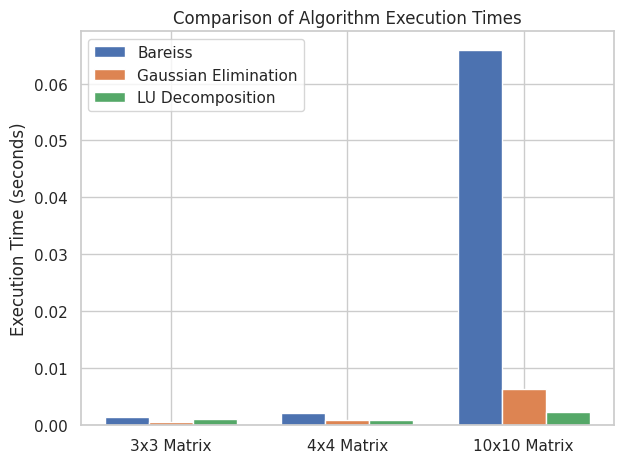

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Execution time data (in seconds)
labels = ['3x3 Matrix', '4x4 Matrix', '10x10 Matrix']
bareiss_times = [0.001374, 0.00202, 0.065903]
gaussian_times = [0.000430, 0.000856, 0.006340]
lu_times = [0.000948, 0.000885, 0.002264]

x = np.arange(len(labels))  # Label positions
width = 0.25  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, bareiss_times, width, label='Bareiss')
rects2 = ax.bar(x, gaussian_times, width, label='Gaussian Elimination')
rects3 = ax.bar(x + width, lu_times, width, label='LU Decomposition')

# Adding some features
ax.set_ylabel('Execution Time (seconds)')
ax.set_title('Comparison of Algorithm Execution Times')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
